# Severity prediction of traffic accident in the City of Seattle 

This project aimed at predicting collision severity based on a dataset hosted by the City of Seattle. In particular, the collisions with only property damage are labeled as less severe accidents; the ones involving injuries are deemed as severe. The dataset consists of features such as environmental conditions (<em>e.g.</em>, weather, road condition, and lighting condition), time of the accident, location information (<em>e.g.</em>, type of road), as well as the number of people and vehicles involved. Some of these factors, such as the number of cyclists in the recorded accidents, tend to be obvious features in predicting the severity of the collision, whereas some may be inevident (<em>e.g.</em>, particular road region) but bearing important insights into mitigating the severity of traffic accidents for the city.  

---
## Data
* Categorical features

## Model

## Highlights
* what lead to severe collision

### Load libraries

In [70]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
pd.set_option('display.max_columns', None)

### Read and explore the dataset

In [11]:
df = pd.read_csv('Data-Collisions.csv', low_memory=False, parse_dates=["INCDATE"])
df["MONTH"] = df["INCDATE"].dt.month
df["YEAR"] = df["INCDATE"].dt.year

print(df.shape)
df.head()

(194673, 40)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,MONTH,YEAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,3,2013
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,12,2006
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,11,2004
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N,3,2013
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,1,2004


In [3]:
df.columns
# 'STATUS'??

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'MONTH', 'YEAR'],
      dtype='object')

1    70.109877
2    29.890123
Name: SEVERITYCODE, dtype: float64


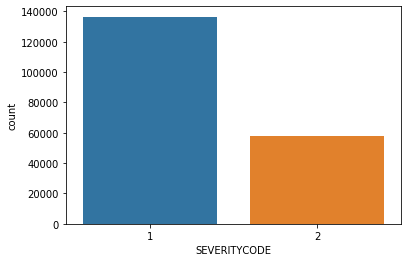

In [4]:
sns.countplot(df["SEVERITYCODE"])

print(df["SEVERITYCODE"].value_counts(normalize=True)*100)

In [22]:
# data type and cardinality for each feature
col_names = []
col_cardinality = []

for feature in df.columns:
    col_names.append(feature)
    cardinality = len(df[feature].unique())
    col_cardinality.append(cardinality)

pd.DataFrame([col_cardinality], columns=col_names)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,MONTH,YEAR
0,2,23564,23840,194673,194673,194673,194670,2,4,7615,24103,3,2,2,2,11,47,7,3,13,5985,162058,8,39,39,2,2,12,10,10,2,114933,2,64,63,1955,2198,2,12,17


### Summary of features
#### Location related information
X, Y(~24000): continous; INTKEY(7615); LOCATION(24103); ADDRTYPE(4); JUNCTIONTYPE(8)

#### Time of the collision
INCDATE[month, year], INCDTTM

#### Descriptive type of the collision
COLLISIONTYPE(11), PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT, 

SDOT_COLCODE(39); SDOT_COLDESC [code given to the collision by SDOT]; ST_COLCODE(64); ST_COLDESC [State Collision Code];

SEGLANEKEY(1955); CROSSWALKKEY(2198)

HITPARKEDCAR(2)

#### Possible reasons for collison
INATTENTIONIND(2); UNDERINFL(2); SPEEDING(2); 

PEDROWNOTGRNT(2) [Whether or not the pedestrian right of way was not granted]

#### Other related conditions of the collision
WEATHER(12); ROADCOND(10); LIGHTCOND(10)

#### unknown...
STATUS (matched, unmatched)

In [24]:
# distribution of severity among cardinality for each feature
feature = 'SDOT_COLDESC'
df[[feature, "SEVERITYCODE"]].groupby([feature, "SEVERITYCODE"]).size()

# df.groupby(by=feature).size()  #if only interested in how feature is distributed

SDOT_COLDESC                                                SEVERITYCODE
DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT          1               96
                                                            2               11
DRIVERLESS VEHICLE RAN OFF ROAD - NO COLLISION              1                1
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT END AT ANGLE  1               97
                                                            2                7
                                                                            ..
PEDALCYCLIST STRUCK OBJECT IN ROAD                          2               22
PEDALCYCLIST STRUCK PEDALCYCLIST FRONT END AT ANGLE         2                5
PEDALCYCLIST STRUCK PEDALCYCLIST REAR END                   2                7
PEDALCYCLIST STRUCK PEDESTRIAN                              1                3
                                                            2               72
Length: 73, dtype: int64

In [18]:
df['SDOT_COLDESC'].unique()

array(['MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END',
       'PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE',
       'MOTOR VEHICLE STRUCK OBJECT IN ROAD',
       'MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE',
       'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END',
       'NOT ENOUGH INFORMATION / NOT APPLICABLE',
       'MOTOR VEHCILE STRUCK PEDESTRIAN',
       'PEDALCYCLIST OVERTURNED IN ROAD',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE',
       'MOTOR VEHICLE OVERTURNED IN ROAD',
       'MOTOR VEHICLE RAN OFF ROAD - NO COLLISION',
       'DRIVERLESS VEHICLE RAN OFF ROAD - HIT F

In [17]:
df['PEDROWNOTGRNT'].describe()

count     4667
unique       1
top          Y
freq      4667
Name: PEDROWNOTGRNT, dtype: object

#### Locations

(-122.39972081136344,
 -122.27004288863661,
 47.5025454816358,
 47.731724108364205)

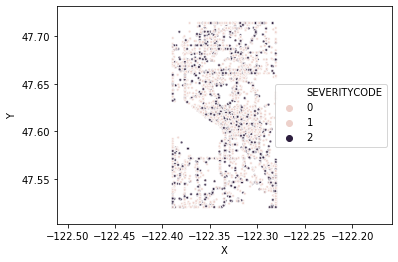

In [148]:
# plot the X/Y coordinates as a scatterplot where each dot is color-coded by the severity code.
# we randomly sample N (e.g. N=5000) to prevent from cluttering.
# X/Y values are clamped so that they are not affected by outliers

indices = np.arange(df.shape[0])
np.random.shuffle(indices)

g = sns.scatterplot(data=df.loc[indices[:5000], :], x='X', y='Y', hue='SEVERITYCODE', alpha=.8, s=8)

# df['Y'].quantile([.05, .95])  # the range of X,Y coordinates for location
g.set(xlim=df['X'].quantile([.05, .95]), ylim=df['Y'].quantile([.05, .95]))
plt.axis('equal')

In [43]:
# we can also plot the likelihood of severity on one axis at a time, at a coarser granularity

def binify_values(s, clamp_alpha=.05, bins=50):
    low, hi = s.quantile([clamp_alpha, 1.0 - clamp_alpha])
    s[s < low] = low
    s[s > hi] = hi
    
    return pd.cut(s, bins, labels=np.arange(bins))

In [44]:
def compute_severity_ratio(g):
    severity_counts = g.groupby('SEVERITYCODE').size()
    ratio = severity_counts.iloc[0] / severity_counts.iloc[1]
    return ratio


def severity_location_distribution(df, loc, nbin):
    
    # dataframe with binned loc and severity within that range
    df_loc = pd.DataFrame({loc: binify_values(df[loc], bins=nbin), 'SEVERITYCODE': df['SEVERITYCODE']})
    
    # count each severity level
    loc_by_severity_counts = df_loc.groupby([loc, 'SEVERITYCODE']).size().reset_index().rename(columns={0: 'count'})
    
    # visualize
    sns.barplot(data=loc_by_severity_counts, x=loc, y='count', hue='SEVERITYCODE')
#     df_loc.groupby(loc).apply(compute_severity_ratio).plot()


/Users/chengqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/chengqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/chengqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/chengqiu/anaconda3/lib/python3.7/site-packages/i

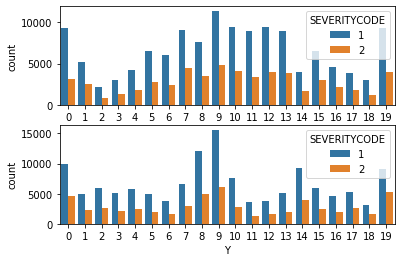

In [26]:
plt.subplot(2, 1, 1)
severity_location_distribution(df, 'X', nbin=20)

plt.subplot(2, 1, 2)
severity_location_distribution(df, 'Y', nbin=20)


#### Time of the day
For example, distribution of collision severity by month & time of the day

In [233]:
df['INCDTTM'] #'INCDTTM', 'INCDATE'

0           3/27/2013 2:54:00 PM
1          12/20/2006 6:55:00 PM
2         11/18/2004 10:20:00 AM
3           3/29/2013 9:26:00 AM
4           1/28/2004 8:04:00 AM
                   ...          
194668     11/12/2018 8:12:00 AM
194669     12/18/2018 9:14:00 AM
194670      1/19/2019 9:25:00 AM
194671      1/15/2019 4:48:00 PM
194672     11/30/2018 3:45:00 PM
Name: INCDTTM, Length: 194673, dtype: object

In [53]:
np.sum(df['MONTH'].isnull())

0

In [26]:
# 
df['X'].describe()

count    189339.000000
mean       -122.330518
std           0.029976
min        -122.419091
25%        -122.348673
50%        -122.330224
75%        -122.311937
max        -122.238949
Name: X, dtype: float64

### Data preprocess 

#### Data clean up
(fillna & missing data, combine same meaning labels)
* UNDERINFL

In [20]:
# e.g., UNDERINFL, four categories, however, [0,1] & [N,Y] indicate likewise
def for_UNDERINFL(x):
    if x in ['Y','1']:
        return 1
    elif x in ['N','0']:
        return 0
    else:
        return x
    
df["UNDERINFL"] = df["UNDERINFL"].apply(for_UNDERINFL)

In [21]:
df['UNDERINFL'].fillna(0, inplace=True)

* location X, Y

In [45]:
# location
loc_y = binify_values(df['Y'], bins=50)
loc_y = loc_y.cat.add_categories(-99)  # fill missing data with -99
loc_y.fillna(-99, inplace=True)
loc_x = binify_values(df['X'], bins=50)
loc_x = loc_x.cat.add_categories(-99)  # fill missing data with -99
loc_x.fillna(-99, inplace=True)

/Users/chengqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/chengqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### One hot encoding of categorical features

In [28]:
def categ_to_one_hot(df, feature='ROADCOND'):
    enc = preprocessing.OneHotEncoder()
    # fill in None, to reshape to 2D (column)
    col = df[feature].fillna("").values.reshape(-1, 1)
    # one hot encode
    one_hot_encoded = enc.fit_transform(col).toarray()
    
    # to a data frame
    df_cols = {}
    for col_index, cat in enumerate(enc.categories_[0]):
        df_cols[feature + '_' + cat] = one_hot_encoded[:, col_index]

    return pd.DataFrame(df_cols)

In [30]:
df_addrtype = categ_to_one_hot(df, feature='ADDRTYPE')
df_collisiontype = categ_to_one_hot(df, feature='COLLISIONTYPE')
df_junctiontype = categ_to_one_hot(df, feature='JUNCTIONTYPE')

df_weather = categ_to_one_hot(df, feature='WEATHER')
df_roadcond = categ_to_one_hot(df, feature='ROADCOND')
df_lightcond = categ_to_one_hot(df, feature='LIGHTCOND')

In [35]:
df['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [36]:
df_sdotcold=categ_to_one_hot(df, feature='SDOT_COLDESC')

### Initial decision tree model

In [77]:
df_preprocessed = pd.concat([df_addrtype, df_collisiontype, df_junctiontype, 
                             df_weather, df_roadcond, df_lightcond, 
                             df[['PERSONCOUNT', 'PEDCYLCOUNT', 'PEDCOUNT','VEHCOUNT','UNDERINFL']], 
                             loc_y.astype(int), loc_x.astype(int)], axis=1)
# df_preprocessed = pd.concat([df['PEDCOUNT'], df['PEDCYLCOUNT'], df['VEHCOUNT'], df_sdotcold], axis=1)
# df_preprocessed = pd.concat([df_collisiontype, df['UNDERINFL']], axis=1)
df_preprocessed

,ADDRTYPE_,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,WEATHER_,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,PERSONCOUNT,PEDCYLCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,Y,X
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0,0,2,0.0,46,28
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,2,0.0,31,17
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0,0,3,0.0,21,23
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0,0,3,0.0,20,23
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0,0,2,0.0,4,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0,0,2,0.0,10,44
194669,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0,0,2,0.0,43,18
194670,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0,0,2,0.0,41,36
194671,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,0,1,0.0,40,13


In [146]:
# clf = DecisionTreeClassifier(random_state=0)
# cross_val_score(clf, df_preprocessed, df['SEVERITYCODE'], cv=10)

df_collisiontype by itself can push the cross_val_score to ~.75; 

df['PEDCYLCOUNT'] can do ~.72; df['PEDCOUNT'] is ~.73; df['VEHCOUNT'] is ~.71; these three combined reaches .75; 



In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    df_preprocessed, df['SEVERITYCODE'], test_size=0.2, random_state=1)
tree = DecisionTreeClassifier(criterion="gini", max_depth = None, class_weight=None).fit(X_train, y_train)
# class_weight:default-None; 'balanced' means to adjust weights based on label distribution 
# (inverse to the proportion, so more leads to less important)

tree_pred = tree.predict(X_test)
tree_pred

print('Score:',accuracy_score(tree_pred, y_test))
print('F1-Score:',f1_score(tree_pred, y_test))
print('Confusion Martix:')
print(confusion_matrix(y_test, tree_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, tree_pred))

Score: 0.6973160395531013
F1-Score: 0.7899024833758224
Confusion Martix:
[[22154  5205]
 [ 6580  4996]]

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.81      0.79     27359
           2       0.49      0.43      0.46     11576

    accuracy                           0.70     38935
   macro avg       0.63      0.62      0.62     38935
weighted avg       0.69      0.70      0.69     38935



0.6457180919809663


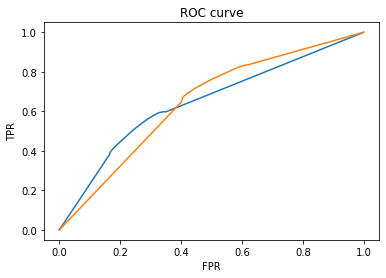

In [102]:
predictions = tree.predict_proba(X_test)
print(roc_auc_score(y_test, predictions[:,1]))

fpr, tpr, _ = roc_curve(y_test-1, predictions[:,1])
fpr_0, tpr_0, _ = roc_curve((3-y_test)-1, predictions[:,0])


plt.clf()
plt.plot(fpr, tpr)
plt.plot(fpr_0, tpr_0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [100]:
y_test

94063     1
137563    2
78237     1
105763    1
138711    1
         ..
150024    1
182941    2
43164     1
132107    2
123955    2
Name: SEVERITYCODE, Length: 38935, dtype: int64

In [80]:
pd.Series(tree.feature_importances_, index=df_preprocessed.columns)
# the importance decided based on the information gain achieved based on the feature at splits
#

ADDRTYPE_                0.000289
ADDRTYPE_Alley           0.000492
ADDRTYPE_Block           0.006777
ADDRTYPE_Intersection    0.005911
COLLISIONTYPE_           0.002775
                           ...   
PEDCOUNT                 0.062808
VEHCOUNT                 0.013354
UNDERINFL                0.009318
Y                        0.194665
X                        0.204095
Length: 62, dtype: float64

In [81]:
tree.tree_.max_depth

54

### Random forest

In [112]:
forest = RandomForestClassifier(n_estimators=100,criterion="gini", max_depth = 5, 
                                class_weight=None).fit(X_train, y_train)
# max_features: default - 'auto', sqrt(n_features)
# bootstrap: bool, default=True
# max_samples: int or float, default=None (when bootstrap is TRUE, None - draw same number of samples)
#
forest_pred = forest.predict(X_test)
forest_pred

print('Score:',accuracy_score(forest_pred, y_test))
print('F1-Score:',f1_score(forest_pred, y_test))
print('Confusion Martix:')
print(confusion_matrix(y_test, forest_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, forest_pred))

predictions = forest.predict_proba(X_test)
print('auc: ' + str(roc_auc_score(y_test, predictions[:,1])))


Score: 0.7504815718505201
F1-Score: 0.8479964952357111
Confusion Martix:
[[27099   260]
 [ 9455  2121]]

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27359
           2       0.89      0.18      0.30     11576

    accuracy                           0.75     38935
   macro avg       0.82      0.59      0.58     38935
weighted avg       0.79      0.75      0.69     38935

auc: 0.7797183743990328


In [85]:
pd.Series(forest.feature_importances_, index=df_preprocessed.columns)

ADDRTYPE_                0.000463
ADDRTYPE_Alley           0.000326
ADDRTYPE_Block           0.006894
ADDRTYPE_Intersection    0.008900
COLLISIONTYPE_           0.001359
                           ...   
PEDCOUNT                 0.034093
VEHCOUNT                 0.032735
UNDERINFL                0.009514
Y                        0.265439
X                        0.282995
Length: 62, dtype: float64

In [89]:
forest.n_features_

62

### xgboost

In [90]:
import xgboost as xgb

In [106]:
dtrain = xgb.DMatrix(X_train, label=y_train-1)
dtest = xgb.DMatrix(X_test, label=y_test-1)

param = {'max_depth': 5, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10)

[0]	eval-auc:0.77144	train-auc:0.77245
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 10 rounds.
[1]	eval-auc:0.78571	train-auc:0.78730
[2]	eval-auc:0.79113	train-auc:0.79334
[3]	eval-auc:0.79340	train-auc:0.79581
[4]	eval-auc:0.79504	train-auc:0.79954
[5]	eval-auc:0.79516	train-auc:0.80038
[6]	eval-auc:0.79530	train-auc:0.80117
[7]	eval-auc:0.79487	train-auc:0.80190
[8]	eval-auc:0.79461	train-auc:0.80244
[9]	eval-auc:0.79470	train-auc:0.80306


In [113]:
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
print('auc: ' + str(roc_auc_score(y_test-1, ypred)))

auc: 0.7946992376417247


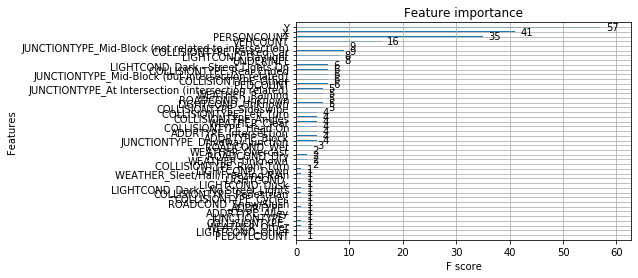

In [109]:
xgb.plot_importance(bst)

In [118]:
# bst.get_fscore()
bst.get_score(importance_type='gain')

{'COLLISIONTYPE_Parked Car': 1624.9887929244444,
 'PEDCOUNT': 1086.3144556633333,
 'PEDCYLCOUNT': 4816.03809,
 'COLLISIONTYPE_Sideswipe': 626.322677448,
 'PERSONCOUNT': 109.57311534788573,
 'VEHCOUNT': 39.16676217500001,
 'LIGHTCOND_Unknown': 21.543782041999997,
 'Y': 11.357837392,
 'JUNCTIONTYPE_Mid-Block (not related to intersection)': 7.9379614683333335,
 'LIGHTCOND_Other': 2.56445312,
 'WEATHER_Other': 0.0773925781,
 'ROADCOND_Wet': 2.4094918533333334,
 'UNDERINFL': 43.1499003725,
 'ROADCOND_Unknown': 125.8358948,
 'WEATHER_Raining': 4.14626498002,
 'COLLISIONTYPE_Other': 113.59619768,
 'COLLISIONTYPE_': 391.51413,
 'COLLISIONTYPE_Right Turn': 191.17873451,
 'JUNCTIONTYPE_At Intersection (intersection related)': 29.148000048,
 'JUNCTIONTYPE_Mid-Block (but intersection related)': 14.354772885000001,
 'JUNCTIONTYPE_Driveway Junction': 3.1654523625,
 'WEATHER_Unknown': 14.0493722,
 'X': 6.455375329204879,
 'ADDRTYPE_Block': 3.6862703670000005,
 'LIGHTCOND_Daylight': 15.44480702375,
 '

In [115]:
# xgb.plot_tree(bst, num_trees=2)